In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
MEpisodes = ["11","12","13","14","15","16"]
FEpisodes = ["21","22","23","24","25","26"]
KEpisodes = ["31","32","33","34","35","36"]
userIds = range(200)

In [304]:
data = {}
data['userId'] = []
data['episode'] = []
data['gender'] = []

def addShow(user,episode,gender):
    data['userId'].append(user)
    data['episode'].append(episode)
    data['gender'].append(gender)
for i in range(200):
    user = i
    m=0
    f=0
    k=0
    gender = 0
    if np.random.rand() < 0.5:
        gender = 1
    shows = np.random.randint(2,6)
    for s in range(shows):
        g = np.random.rand()
        if gender == 0:
            if g < 0.65:
                addShow(user,MEpisodes[m],gender)
                m+=1
            elif g > 0.65 and g < 0.85:
                addShow(user,KEpisodes[k],gender)
                k+=1
            else:
                addShow(user,FEpisodes[f],gender)
                f+=1
        else:
            if g < 0.65:
                addShow(user,FEpisodes[f],gender)
                f+=1
            elif g > 0.5 and g < 0.85:
                addShow(user,KEpisodes[k],gender)
                k+=1
            else:
                addShow(user,MEpisodes[m],gender)
                m+=1

            
dataset = pd.DataFrame(data)
dataset = dataset.iloc[np.random.permutation(len(dataset))]
dataset.reset_index(drop=True)
trainingdata = dataset[0:500]
testData = dataset[500:]     


234 266


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: sort(....) is deprecated, use sort_index(.....)
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: sort(....) is deprecated, use sort_index(.....)


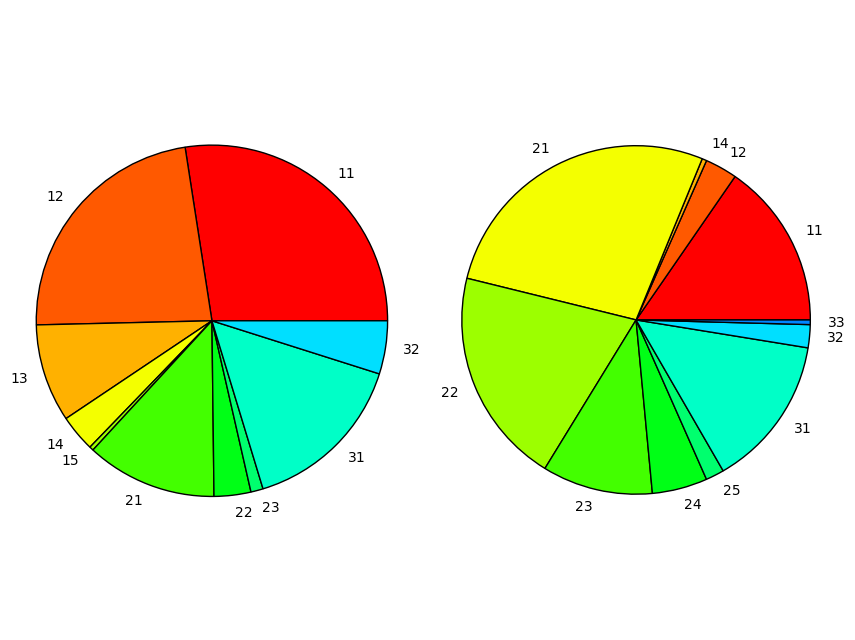

In [305]:
### Training summaries
%matplotlib inline
def showPercent(data):
    maleCount = data[data.gender == 1].shape[0]
    femaleCount = data[data.gender == 0].shape[0]
    print(maleCount,femaleCount)
    fig,axes = plt.subplots(nrows = 1, ncols=  2, figsize=(10,8))
    #c = get_cmap(len(MEpisodes))
    m=data[data.gender==0].groupby('episode').agg('count').sort()['gender']
    #print(m)
    i=axes[0].pie(m.values, labels=m.index,colors=c)
    f=data[data.gender==1].groupby('episode').agg('count').sort()['gender']
    i=axes[1].pie(f.values, labels=f.index, colors=c)
    #print(f)
    i=axes[0].axis('equal')
    i=axes[1].axis('equal')
showPercent(trainingdata)

In [306]:
from sklearn import linear_model as lm

logReg = lm.LogisticRegression()
train = trainingdata[0:300]
control = trainingdata[301:500]
predicted = logReg.fit(train[['episode','userId']],train[['gender']]).score(control[['episode','userId']],control[['gender']])
predicted

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.67839195979899503

In [307]:
testPredict = logReg.predict(testData[['episode','userId']]).reshape(testData.shape[0],1)

In [308]:
predicted = testData[['gender']] == testPredict

In [337]:
realIndex = 0
def checkPredicted(x,prediction):
    p = np.logical_and.reduce(predicted.ix[x.index.values].values)
    return pd.Series([x['episode'].count(),p[0],x['gender'].max()],['episodeCount','prediction','gender'])
    

predictedData = testData.groupby('userId').apply(checkPredicted,prediction=predicted).reset_index()

In [338]:
print("Males: ",predictedData[(predictedData['gender']==0 ) & (predictedData['prediction']==False)].shape[0],predictedData[(predictedData['gender']==0 )].shape[0] )
print("Females: ",predictedData[(predictedData['gender']==1 ) & (predictedData['prediction']==False)].shape[0],predictedData[(predictedData['gender']==1 )].shape[0])

Males:  22 67
Females:  21 61


Slope: 0.0743800218263 
Intercept: -1.70113901914
-3 201


KeyError: 'episode'

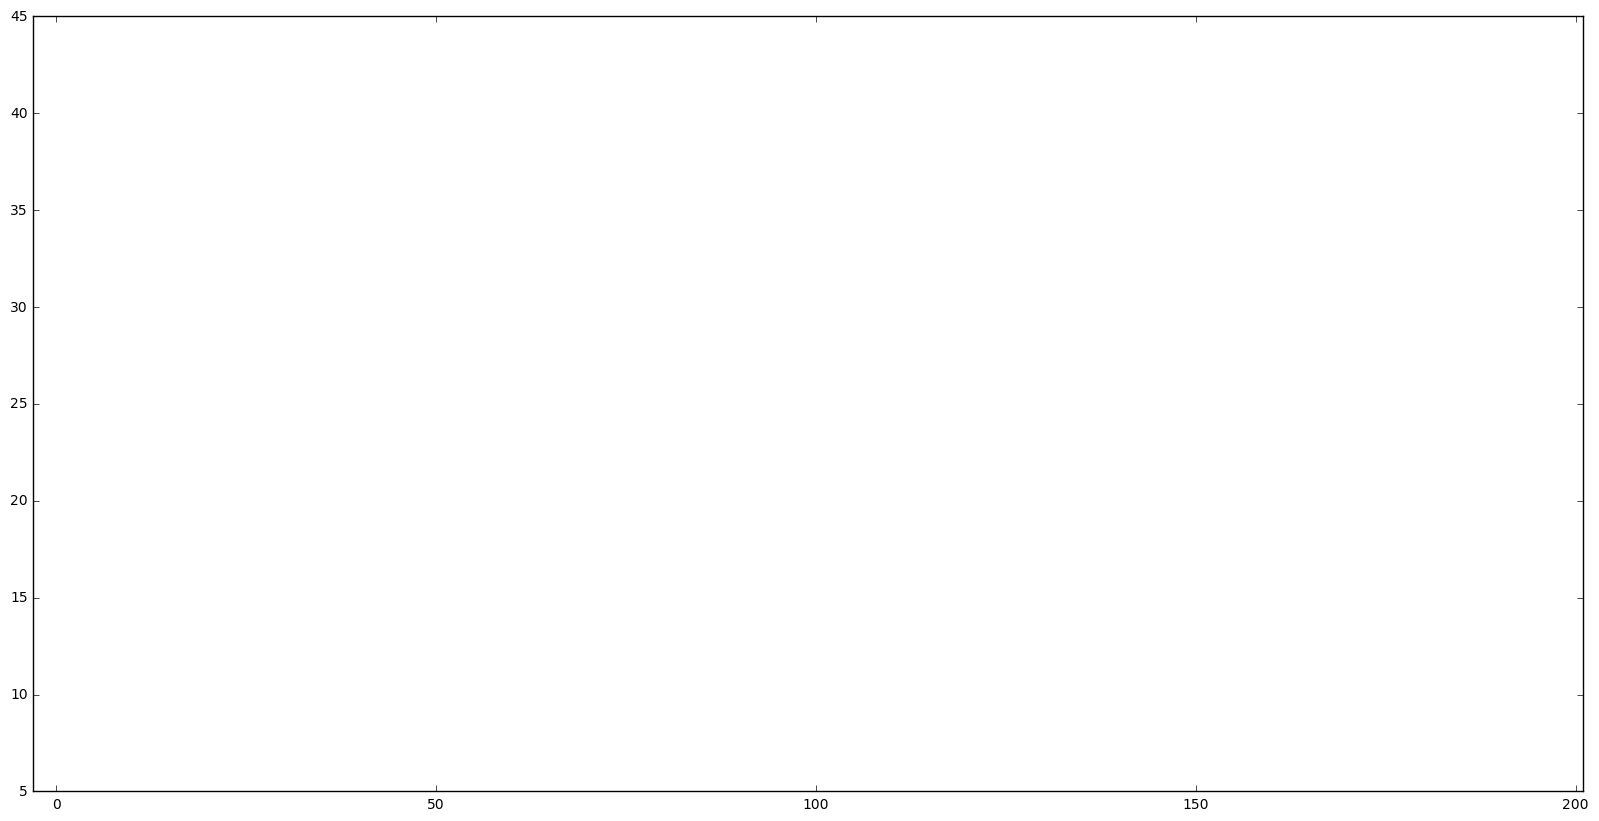

In [339]:
def plotRegression(logReg,trainingdata):
    M = logReg.coef_[0][0]
    C = logReg.intercept_[0]
    X1 = np.min(trainingdata.userId)
    print("Slope:",M,"\nIntercept:",C)
    Y1 = M*X1 + C
    X2 = np.max(trainingdata.userId)
    Y2 = M*X2 + C
    plt.figure(figsize=(20,10))
    colours = {0: 'red',1: 'blue'}
    print(X1-3,X2+2)
    plt.xlim(X1-3,X2+2)
    plt.ylim(5,45)
    plt.scatter(trainingdata['userId'],trainingdata['episode'],c=[getColor(i) for i in trainingdata['gender']],s=50)
    plt.plot([X1,X2],[Y1,Y2],c='k')
plotRegression(logReg,predictedData)

In [408]:
testPredict

array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

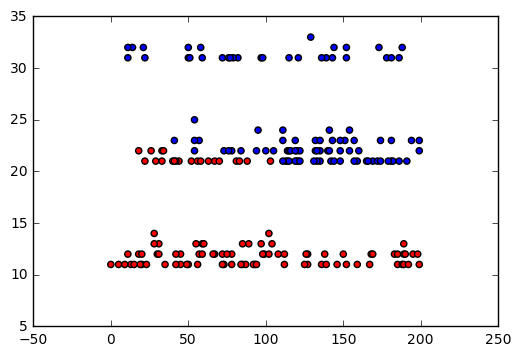

In [412]:
plt.scatter(testData['userId'],testData['episode'],c=[colours[t[0]] for t in testPredict],s=20)

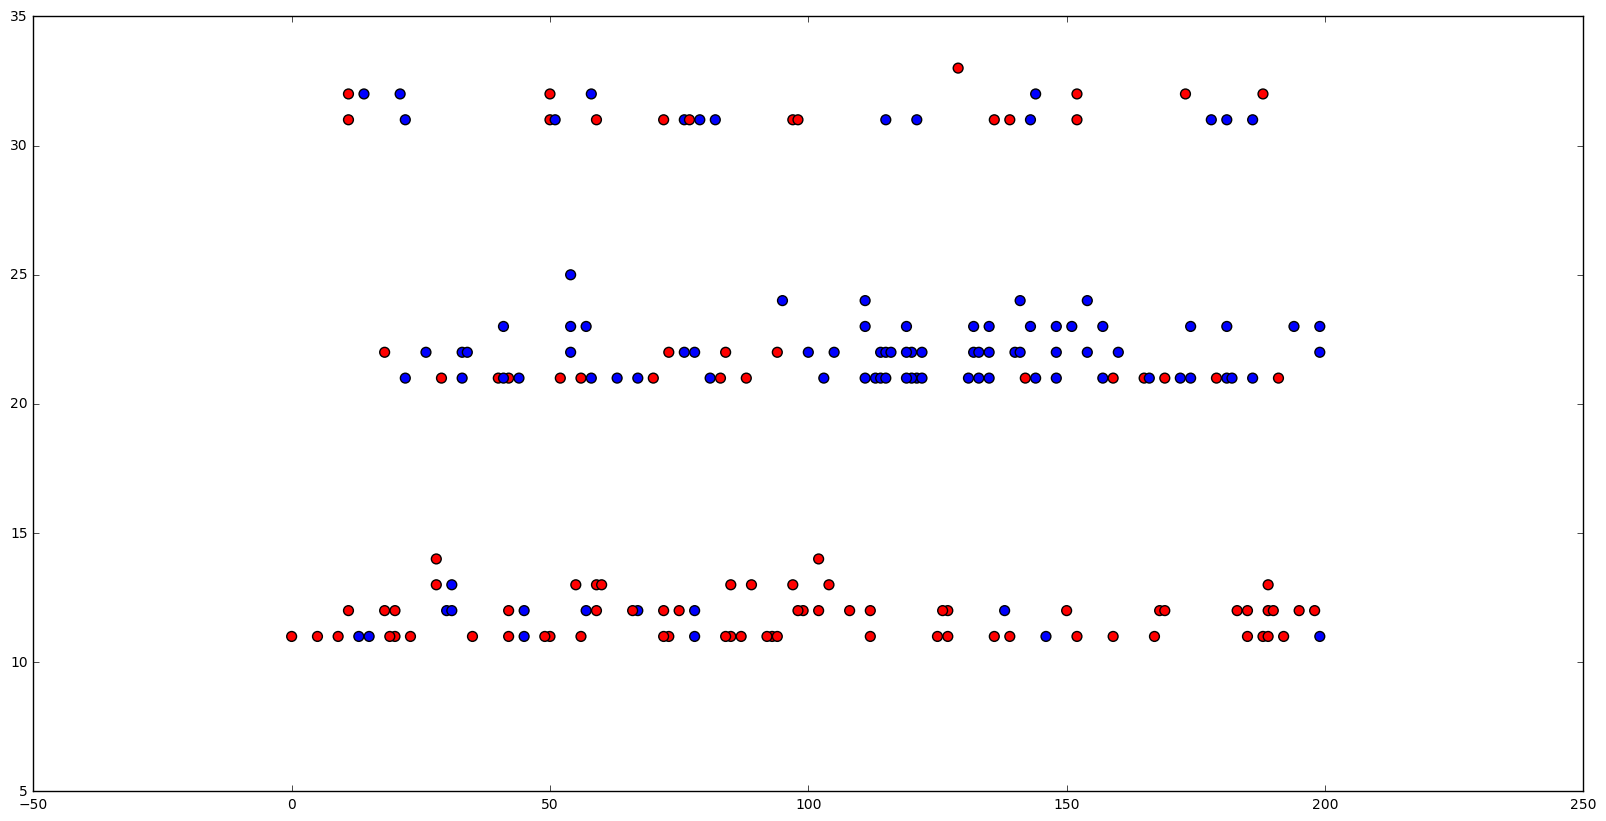

In [381]:
plt.figure(figsize=(20,10))
plt.scatter(testData['userId'],testData['episode'],c=[colours[i] for i in testData['gender']],s=50)
    

In [380]:
logReg.coef_

array([[ 0.07438002,  0.00131137]])

In [5]:
import matplotlib.cm as cmx
import matplotlib.colors as colors
def get_cmap(N):
    '''Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.'''
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

N = len(MEpisodes)*3
a = get_cmap(N)
c = [a(i) for i in range(N)]


[0, 1, 2]